## Aggregation of token training using LLM2Vec with LLaMA-3

In [5]:
import os, json

file_path = "../output/llm2vec_llama3/"

os.listdir(file_path)

['sample']

In [6]:
import pandas as pd
json_data=[]
for fp in os.listdir(file_path):
    if fp.split('_')[0:3]==["token",'llama','scopes']:
        print()
        print(fp)
        fp_path=os.path.join(file_path,fp)
        #print(fp_path)
        json_list=os.listdir(fp_path)
        json_list=sorted(json_list)
        arr=[[] for _ in range(2)]
        for i in range(len(json_list)):
            js=json_list[i]
            if js.split('.')[0]=='model_setup':
                arr[0].append(js)
            elif js.split('_')[0]=='eval':
                arr[1].append(js)
        print(arr)# split json files 3types
        tmp_dict={}
        for i in range(len(json_list)):
            js=json_list[i]
            #print(os.path.join(fp_path,js))
            json_path=os.path.join(fp_path,js)
            with open(json_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
                if js==arr[0][0]:#Metadata of model
                    tmp_dict.update(data)
                    print(data)
                if js==arr[1][-3]:#eval_metrics
                    tmp_dict.update(data)
                    print(data)
        print(tmp_dict)
        json_data.append(tmp_dict)

print()
print("result")
print(json_data)


result
[]


In [7]:
import numpy as np
df_json=pd.DataFrame(json_data).replace("None", np.nan)
df_json.head(10)

""


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 'loss'

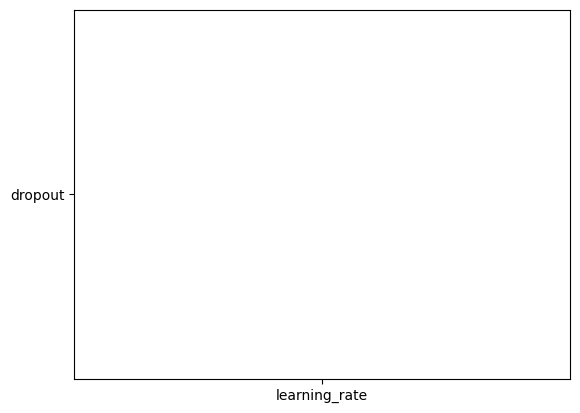

In [8]:
import matplotlib.pyplot as plt

plt.scatter(data = df_json, x = 'learning_rate', y = 'dropout', c = 'loss', cmap = 'Blues')
plt.xlabel('learning_rate')
plt.ylabel('dropout')
plt.colorbar()

### Results of token training using LLM2Vec with LLaMA-3

In [ ]:
df_json=df_json.sort_values(['macro_f1','total_f1','acc'],ignore_index=True, ascending=False)
df_json.head(10)

,loss,acc,macro_f1,total_f1,inf_f1,perc_f1,backg_f1,full_training,segment,mode,model_name,batch_size,max_epoch,learning_rate,dropout
0,1.273438,0.700625,0.614546,0.780167,0.671416,0.491694,0.460228,False,token_llama,scopes,llm2vec_llama3,2,20,0.00005,0.15
1,1.710938,0.713130,0.605669,0.774243,0.684308,0.522946,0.367003,False,token_llama,scopes,llm2vec_llama3,2,20,0.00005,0.20
2,1.429688,0.689653,0.602960,0.774505,0.692127,0.490948,0.400133,False,token_llama,scopes,llm2vec_llama3,4,20,0.00012,0.15
3,1.515625,0.691369,0.601645,0.765771,0.679727,0.479624,0.416680,False,token_llama,scopes,llm2vec_llama3,1,20,0.00003,0.00
4,1.382812,0.694373,0.598974,0.760178,0.688687,0.482089,0.394595,False,token_llama,scopes,llm2vec_llama3,4,20,0.00005,0.05
5,1.234375,0.670651,0.592803,0.759811,0.677958,0.490066,0.397729,False,token_llama,scopes,llm2vec_llama3,2,20,0.00012,0.20
6,1.304688,0.664276,0.592735,0.762177,0.692179,0.476972,0.396792,False,token_llama,scopes,llm2vec_llama3,4,20,0.00005,0.10
7,1.515625,0.688427,0.591285,0.770767,0.679397,0.465055,0.389128,False,token_llama,scopes,llm2vec_llama3,4,20,0.00010,0.15
8,0.968750,0.657963,0.589755,0.774765,0.646465,0.488596,0.421199,False,token_llama,scopes,llm2vec_llama3,1,20,0.00007,0.05
9,1.773438,0.704793,0.589340,0.761868,0.666667,0.456197,0.390887,False,token_llama,scopes,llm2vec_llama3,4,20,0.00005,0.15


In [ ]:
print("Best batch_size and max_epochs")
df_json.iloc[0]

Best batch_size and max_epochs


loss                   1.273438
acc                    0.700625
macro_f1               0.614546
total_f1               0.780167
inf_f1                 0.671416
perc_f1                0.491694
backg_f1               0.460228
full_training             False
segment             token_llama
mode                     scopes
model_name       llm2vec_llama3
batch_size                    2
max_epoch                    20
learning_rate           0.00005
dropout                    0.15
Name: 0, dtype: object

## Aggregation of full training using LLM2Vec with LLaMA-3

In [ ]:
json_data=[]
for fp in os.listdir(file_path):
    if fp.split('_')[1:2]==['full']:
        print()
        print(fp)
        fp_path=os.path.join(file_path,fp)
        #print(fp_path)
        json_list=os.listdir(fp_path)
        json_list=sorted(json_list)
        arr=[[] for _ in range(2)]
        for i in range(len(json_list)):
            js=json_list[i]
            if js.split('.')[0]=='model_setup':
                arr[0].append(js)
            elif js.split('_')[0]=='eval':
                arr[1].append(js)
        print(arr)# split json files 3types
        tmp_dict={}
        for i in range(len(json_list)):
            js=json_list[i]
            #print(os.path.join(fp_path,js))
            json_path=os.path.join(fp_path,js)
            with open(json_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
                if js==arr[0][0]:#Metadata of model
                    tmp_dict.update(data)
                    print(data)
                if js==arr[1][-3]:#eval_metrics
                    tmp_dict.update(data)
                    print(data)
        print(tmp_dict)
        json_data.append(tmp_dict)

print()
print("result")
print(json_data)


_full_sentence_majo_scopes_2_5e-05_0.1
[['model_setup.json'], ['eval_metrics1.json', 'eval_metrics2.json', 'eval_metrics3.json', 'eval_metrics4.json', 'eval_metrics5.json', 'eval_metrics6.json', 'eval_metrics7.json']]
{'loss': 1.2265625, 'acc': 0.6437612771987915, 'macro_f1': 0.4992097020149231, 'total_f1': 0.711670458316803, 'inf_f1': 0.47863247990608215, 'perc_f1': 0.35424354672431946, 'backg_f1': 0.35230353474617004}
{'full_training': True, 'segment': 'sentence_majo', 'mode': 'scopes', 'model_name': 'llm2vec_llama3', 'batch_size': 2, 'max_epoch': 20, 'learning_rate': 5e-05, 'dropout': 0.1}
{'loss': 1.2265625, 'acc': 0.6437612771987915, 'macro_f1': 0.4992097020149231, 'total_f1': 0.711670458316803, 'inf_f1': 0.47863247990608215, 'perc_f1': 0.35424354672431946, 'backg_f1': 0.35230353474617004, 'full_training': True, 'segment': 'sentence_majo', 'mode': 'scopes', 'model_name': 'llm2vec_llama3', 'batch_size': 2, 'max_epoch': 20, 'learning_rate': 5e-05, 'dropout': 0.1}

_full_sentence_ma

In [ ]:
df_json=pd.DataFrame(json_data).replace("None", np.nan)
df_json.head(10)

,loss,acc,macro_f1,total_f1,inf_f1,perc_f1,backg_f1,full_training,segment,mode,model_name,batch_size,max_epoch,learning_rate,dropout
0,1.226562,0.643761,0.499210,0.711670,0.478632,0.354244,0.352304,True,sentence_majo,scopes,llm2vec_llama3,2,20,0.00005,0.1
1,0.519531,0.762206,NaN,0.707453,NaN,NaN,NaN,True,sentence_majo,total,llm2vec_llama3,2,20,0.00005,0.1
2,0.664062,0.778481,NaN,0.716107,NaN,NaN,NaN,True,sentence_majo,total,llm2vec_llama3,2,10,1e-04,0.0
3,2.265625,0.507233,0.404947,0.616601,0.337838,0.323232,0.282051,True,sentence_majo,scopes,llm2vec_llama3,2,10,1e-04,0.0
4,1.757812,0.662052,0.581523,0.736147,0.697415,0.461480,0.363546,True,token_llama,scopes,llm2vec_llama3,2,20,0.00005,0.1
5,1.250000,0.644087,0.539713,0.733340,0.639215,0.377767,0.340814,True,token_llama,scopes,llm2vec_llama3,2,10,0.00001,0.0
6,1.304688,0.591320,0.310423,0.530769,0.435424,0.061856,0.000000,True,sentence_prio,scopes,llm2vec_llama3,2,10,1e-04,0.0
7,0.535156,0.767631,NaN,0.681537,NaN,NaN,NaN,True,sentence_prio,total,llm2vec_llama3,2,20,0.00005,0.1
8,1.195312,0.675407,0.457169,0.641698,0.760766,0.126984,0.144330,True,sentence_prio,scopes,llm2vec_llama3,2,20,0.00005,0.1
9,0.617188,0.764014,NaN,0.701714,NaN,NaN,NaN,True,sentence_prio,total,llm2vec_llama3,2,10,1e-04,0.0


### Results of full training using LLM2Vec with LLaMA-3

In [ ]:
df_json=df_json.sort_values(['macro_f1','total_f1','acc'],ignore_index=True, ascending=False)
df_json.head(10)

,loss,acc,macro_f1,total_f1,inf_f1,perc_f1,backg_f1,full_training,segment,mode,model_name,batch_size,max_epoch,learning_rate,dropout
0,1.757812,0.662052,0.581523,0.736147,0.697415,0.461480,0.363546,True,token_llama,scopes,llm2vec_llama3,2,20,0.00005,0.1
1,0.992188,0.663060,0.566512,0.721090,0.691623,0.404004,0.366855,True,token_llama,scopes,llm2vec_llama3,2,10,1e-04,0.0
2,1.250000,0.644087,0.539713,0.733340,0.639215,0.377767,0.340814,True,token_llama,scopes,llm2vec_llama3,2,10,0.00001,0.0
3,1.226562,0.643761,0.499210,0.711670,0.478632,0.354244,0.352304,True,sentence_majo,scopes,llm2vec_llama3,2,20,0.00005,0.1
4,1.195312,0.675407,0.457169,0.641698,0.760766,0.126984,0.144330,True,sentence_prio,scopes,llm2vec_llama3,2,20,0.00005,0.1
5,2.265625,0.507233,0.404947,0.616601,0.337838,0.323232,0.282051,True,sentence_majo,scopes,llm2vec_llama3,2,10,1e-04,0.0
6,1.304688,0.591320,0.310423,0.530769,0.435424,0.061856,0.000000,True,sentence_prio,scopes,llm2vec_llama3,2,10,1e-04,0.0
7,0.470703,0.772982,NaN,0.746843,NaN,NaN,NaN,True,token_llama,total,llm2vec_llama3,2,10,1e-04,0.0
8,0.478516,0.777103,NaN,0.723962,NaN,NaN,NaN,True,token_llama,total,llm2vec_llama3,2,20,0.00005,0.1
9,0.664062,0.778481,NaN,0.716107,NaN,NaN,NaN,True,sentence_majo,total,llm2vec_llama3,2,10,1e-04,0.0


In [ ]:
df_json=df_json.sort_values(['total_f1','acc'],ignore_index=True, ascending=False)
df_json.head(10)

,loss,acc,macro_f1,total_f1,inf_f1,perc_f1,backg_f1,full_training,segment,mode,model_name,batch_size,max_epoch,learning_rate,dropout
0,0.470703,0.772982,NaN,0.746843,NaN,NaN,NaN,True,token_llama,total,llm2vec_llama3,2,10,1e-04,0.0
1,1.757812,0.662052,0.581523,0.736147,0.697415,0.461480,0.363546,True,token_llama,scopes,llm2vec_llama3,2,20,0.00005,0.1
2,1.250000,0.644087,0.539713,0.733340,0.639215,0.377767,0.340814,True,token_llama,scopes,llm2vec_llama3,2,10,0.00001,0.0
3,0.478516,0.777103,NaN,0.723962,NaN,NaN,NaN,True,token_llama,total,llm2vec_llama3,2,20,0.00005,0.1
4,0.992188,0.663060,0.566512,0.721090,0.691623,0.404004,0.366855,True,token_llama,scopes,llm2vec_llama3,2,10,1e-04,0.0
5,0.664062,0.778481,NaN,0.716107,NaN,NaN,NaN,True,sentence_majo,total,llm2vec_llama3,2,10,1e-04,0.0
6,1.226562,0.643761,0.499210,0.711670,0.478632,0.354244,0.352304,True,sentence_majo,scopes,llm2vec_llama3,2,20,0.00005,0.1
7,0.519531,0.762206,NaN,0.707453,NaN,NaN,NaN,True,sentence_majo,total,llm2vec_llama3,2,20,0.00005,0.1
8,0.617188,0.764014,NaN,0.701714,NaN,NaN,NaN,True,sentence_prio,total,llm2vec_llama3,2,10,1e-04,0.0
9,0.535156,0.767631,NaN,0.681537,NaN,NaN,NaN,True,sentence_prio,total,llm2vec_llama3,2,20,0.00005,0.1


In [ ]:
print("Best parameters for full training")
df_json.iloc[0]

Best parameters for full training


loss                   0.470703
acc                    0.772982
macro_f1                    NaN
total_f1               0.746843
inf_f1                      NaN
perc_f1                     NaN
backg_f1                    NaN
full_training              True
segment             token_llama
mode                      total
model_name       llm2vec_llama3
batch_size                    2
max_epoch                    10
learning_rate             1e-04
dropout                     0.0
Name: 0, dtype: object